# (µ+ λ)-ES

In [2]:
pip install cma -q


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cma

# ----- Benchmark functions -----

def sphere(x):
    return np.sum(x**2)

def rastrigin(x):
    x = np.array(x)
    return 10*len(x) + np.sum(x**2 - 10*np.cos(2*np.pi*x))

In [ ]:
def one_plus_one_es_classic(fitness_function, N=10, sigma=0.5, max_generations=1000):
    x = np.random.uniform(-5, 5, N)
    history = []

    for _ in range(max_generations):
        x_prime = x + sigma * np.random.normal(0, 1, N)
        print(fitness_function(x))
        if fitness_function(x_prime) <= fitness_function(x):
            x = x_prime
        history.append(fitness_function(x))
        sigma*=0.99

    return x, history


for f in [sphere]:
    x_best, history = one_plus_one_es_classic(f)
    print(f.__name__, "Best fitness:", history[-1])

80.58259702486106
80.26377151326598
79.62166757307597
71.31562742604636
59.593063601474825
57.465610224531886
50.946250630034854
50.10737158883171
50.10737158883171
50.10737158883171
50.10737158883171
46.73737250247605
46.73737250247605
46.73737250247605
46.73737250247605
38.290746152602296
38.290746152602296
37.35292435249032
37.35292435249032
37.35292435249032
35.00034199224207
30.971634662155957
27.519737693561463
27.519737693561463
27.519737693561463
26.52445192668719
23.597986222648203
23.597986222648203
20.22876238662439
20.22876238662439
20.22876238662439
19.510775517639512
19.510775517639512
19.510775517639512
19.510775517639512
14.525571253671691
14.525571253671691
14.525571253671691
14.525571253671691
12.938598659503269
11.164461073053008
11.164461073053008
11.164461073053008
9.174018251421389
9.174018251421389
8.855405102319901
8.855405102319901
8.489650266211935
8.489650266211935
5.170916126283615
5.170916126283615
5.170916126283615
5.170916126283615
5.170916126283615
5.170

In [ ]:
def one_plus_one_es_classic(fitness_function, N=10, sigma=0.5, max_generations=1000):
    x = np.random.uniform(-5, 5, N)
    history = []

    for _ in range(max_generations):
        x_prime = x + sigma * np.random.normal(0, 1, N)
        print(fitness_function(x))
        if fitness_function(x_prime) <= fitness_function(x):
            x = x_prime
        history.append(fitness_function(x))
        sigma*=0.99

    return x, history


for f in [sphere]:
    x_best, history = one_plus_one_es_classic(f)
    print(f.__name__, "Best fitness:", history[-1])

51.93382674162092
51.93382674162092
51.93382674162092
51.93382674162092
51.93382674162092
51.93382674162092
51.93382674162092
51.93382674162092
51.00798343221044
49.23267718678426
49.23267718678426
42.52998727106325
42.52998727106325
42.52998727106325
38.42166511668042
38.42166511668042
38.42166511668042
38.42166511668042
38.42166511668042
37.60030258221147
37.60030258221147
36.096709063576775
35.313138063922025
35.313138063922025
29.513222699443254
29.513222699443254
18.59375143245042
18.59375143245042
18.019955729673974
16.975945250714382
16.142118321657794
16.142118321657794
16.142118321657794
14.102733951634812
14.102733951634812
14.102733951634812
12.720406449133204
12.720406449133204
12.720406449133204
9.302003896558784
8.482319652891139
7.701137025243174
7.701137025243174
7.701137025243174
7.236503141849005
6.859296609218034
6.859296609218034
6.859296609218034
6.859296609218034
6.29935808853977
6.29935808853977
6.005993209601461
6.005993209601461
4.742954721019071
4.612943040006

In [ ]:
def one_plus_one_es_success_rule(fitness_function, N=10, sigma=0.5, max_generations=2000):
    x = np.random.uniform(-5, 5, N)
    tau = 1.5
    k = 20
    success_count = 0
    history = []

    for t in range(1, max_generations + 1):
        x_prime = x + sigma * np.random.normal(0, 1, N)
        if fitness_function(x_prime) <= fitness_function(x):
            x = x_prime
            success_count += 1

        if t % k == 0:
            success_rate = success_count / k
            if success_rate > 1/5:
                sigma *= tau
            else:
                sigma /= tau
            success_count = 0

        history.append(fitness_function(x))

    return x, history


for f in [sphere, rastrigin]:
    x_best, history = one_plus_one_es_success_rule(f)
    print(f.__name__, "Best fitness:", history[-1])

sphere Best fitness: 2.570695159070079e-23
rastrigin Best fitness: 51.73755189353679


In [7]:
def mu_plus_lambda_es(fitness_fn, dim=10, mu=5, lmbda=20, generations=200, sigma=0.3):
    population = np.random.randn(mu, dim)
    history = []

    for _ in range(generations):
        offspring = []
        for _ in range(lmbda):
            parent = population[np.random.randint(mu)]
            child = parent + sigma * np.random.randn(dim)
            offspring.append(child)

        combined = np.vstack([population, offspring])
        fitness = np.array([fitness_fn(ind) for ind in combined])
        best_indices = np.argsort(fitness)[:mu]
        population = combined[best_indices]
        history.append(fitness[best_indices[0]])

    return population[0], history


for f in [sphere, rastrigin]:
    best, history = mu_plus_lambda_es(f)
    print(f.__name__, "Best fitness:", history[-1])

sphere Best fitness: 0.08245780357765646
rastrigin Best fitness: 32.28106499965327


In [8]:
def self_adaptive_es(fitness_fn, dim=10, mu=5, lmbda=20, generations=200):
    tau = 1 / np.sqrt(dim)
    population = [(np.random.randn(dim), 0.5) for _ in range(mu)]
    history = []

    for _ in range(generations):
        offspring = []
        for _ in range(lmbda):
            x, sigma = population[np.random.randint(mu)]
            sigma_prime = sigma * np.exp(tau * np.random.randn())
            sigma_prime = max(sigma_prime, 1e-8)
            x_prime = x + sigma_prime * np.random.randn(dim)
            offspring.append((x_prime, sigma_prime))

        combined = population + offspring
        fitness = [fitness_fn(ind[0]) for ind in combined]
        best_indices = np.argsort(fitness)[:mu]
        population = [combined[i] for i in best_indices]
        history.append(fitness[best_indices[0]])

    return population[0], history


for f in [sphere, rastrigin]:
    best, history = self_adaptive_es(f)
    print(f.__name__, "Best fitness:", history[-1])

sphere Best fitness: 3.7862843008038265e-16
rastrigin Best fitness: 12.934457666574787


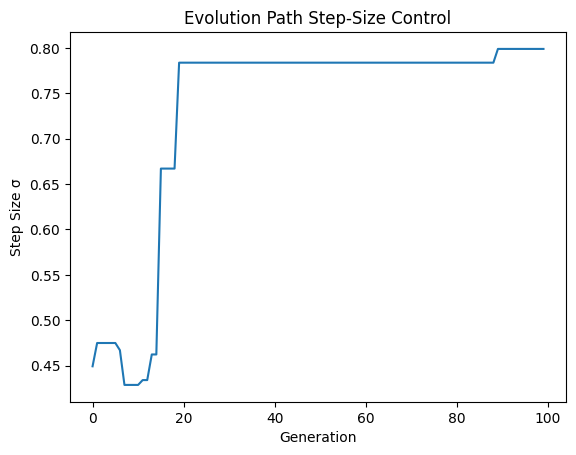

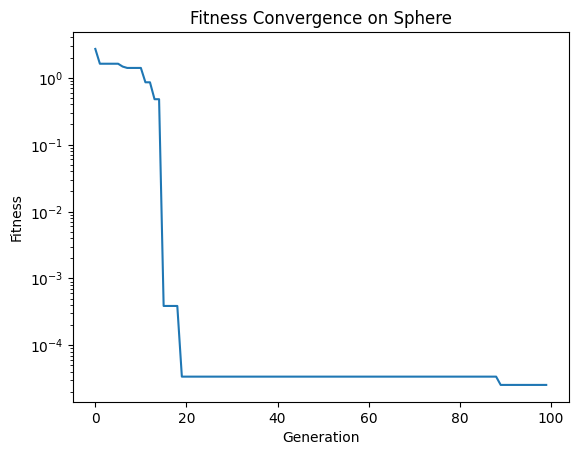

In [9]:
def evolution_path_es(generations=100):
    x = 2.0
    sigma = 0.5
    p_sigma = 0.0
    c_sigma = 0.3
    d_sigma = 1.0
    expected_norm = np.sqrt(2/np.pi)

    sigma_vals = []
    fitness_vals = []

    for _ in range(generations):
        z = np.random.randn()
        x_candidate = x + sigma * z

        # Elitist selection
        if sphere(x_candidate) < sphere(x):
            x = x_candidate
            p_sigma = (1 - c_sigma) * p_sigma + np.sqrt(c_sigma*(2-c_sigma)) * z
            sigma *= np.exp((c_sigma/d_sigma) * (abs(p_sigma)/expected_norm - 1))

        sigma_vals.append(sigma)
        fitness_vals.append(sphere(x))

    return sigma_vals, fitness_vals

sigma_vals, fitness_vals = evolution_path_es()

# Plot step size
plt.figure()
plt.plot(sigma_vals)
plt.xlabel("Generation")
plt.ylabel("Step Size σ")
plt.title("Evolution Path Step-Size Control")
plt.show()

# Plot fitness (log scale)
plt.figure()
plt.plot(fitness_vals)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.yscale("log")
plt.title("Fitness Convergence on Sphere")
plt.show()

In [ ]:
def simple_cma_es(fitness_fn, N=10, sigma=0.5, lambda_=10, mu=5, generations=200):
    x = np.random.randn(N)
    C = np.eye(N)
    history = []

    for _ in range(generations):
        A = np.linalg.cholesky(C)
        Z = np.random.randn(lambda_, N)
        X = x + sigma * Z @ A.T
        fitnesses = np.array([fitness_fn(xi) for xi in X])
        indices = np.argsort(fitnesses)
        selected = X[indices[:mu]]
        x_mean = np.mean(selected, axis=0)

        C_update = np.zeros((N,N))
        for xi in selected:
            diff = xi - x_mean
            C_update += np.outer(diff, diff)
        C = 0.8*C + 0.2*(C_update/mu)

        if fitness_fn(x_mean) <= fitness_fn(x):
            x = x_mean

        history.append(fitness_fn(x))

    return x, history


for f in [sphere, rastrigin]:
    best, history = simple_cma_es(f)
    print(f.__name__, "Best fitness:", history[-1])

sphere Best fitness: 0.0005658648408092597
rastrigin Best fitness: 5.969754910576555


In [11]:
def run_pycma(fitness_fn):
    N = 10
    initial_mean = np.random.randn(N)
    initial_sigma = 0.5

    es = cma.CMAEvolutionStrategy(initial_mean, initial_sigma)
    es.optimize(fitness_fn, maxfun=10000)
    print("Best fitness:", es.result.fbest)

print("Sphere:")
run_pycma(sphere)

print("\nRastrigin:")
run_pycma(rastrigin)

Sphere:
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=1013650, Tue Feb 24 10:05:18 2026)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 4.822104059902047e+00 1.0e+00 5.16e-01  5e-01  5e-01 0:00.0
    2     20 2.578374453439547e+00 1.3e+00 5.43e-01  5e-01  6e-01 0:00.0
    3     30 2.637144702346532e+00 1.4e+00 5.56e-01  5e-01  6e-01 0:00.0
  100   1000 2.757068951627516e-06 1.7e+00 1.72e-03  7e-04  8e-04 0:00.0
  200   2000 4.098139218392805e-13 1.8e+00 1.24e-06  2e-07  2e-07 0:00.1
  221   2210 1.256615378659171e-14 1.7e+00 3.60e-07  4e-08  6e-08 0:00.1
termination on {'tolfun': 1e-11}
final/bestever f-value = 1.256615e-14 1.256615e-14 after 2210/2201 evaluations
incumbent solution: [ 1.24472781e-08  2.42939152e-08 -1.11667279e-08 -1.33603000e-09
  9.18590049e-09  3.45871767e-09 -2.18011929e-08 -5.55129347e-09 ...]
std deviations: [5.05734438e-08 5.00376970e-08 4.79196394e-08 6.14013147e-08
 5.22777777e-08 5.33895898e-08 4.83212446e-08

# EXERCISES 3 (a)(b)(c)

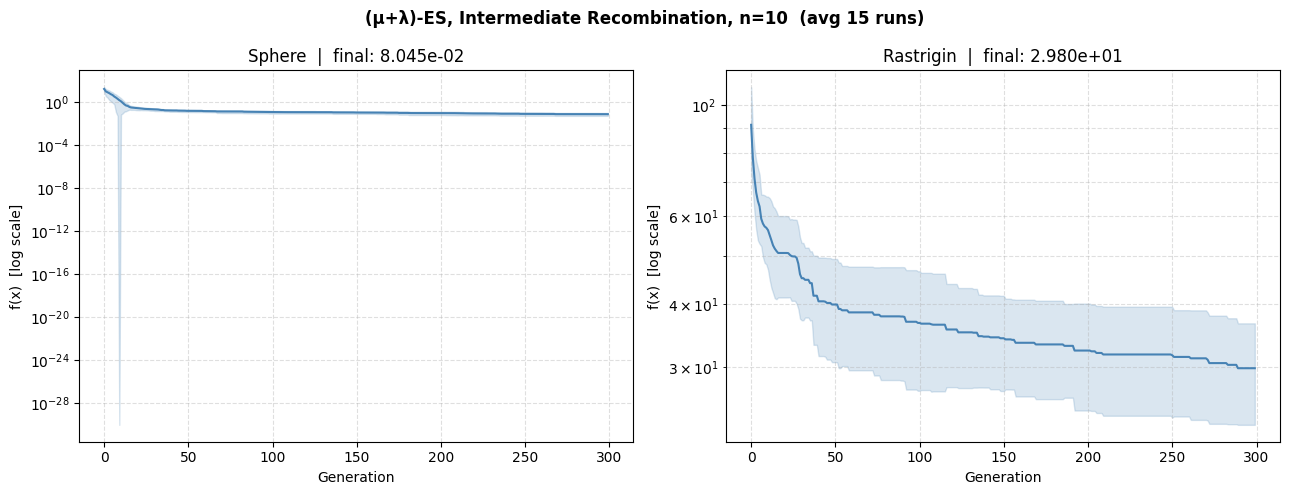

Figure 1 saved — benchmark results


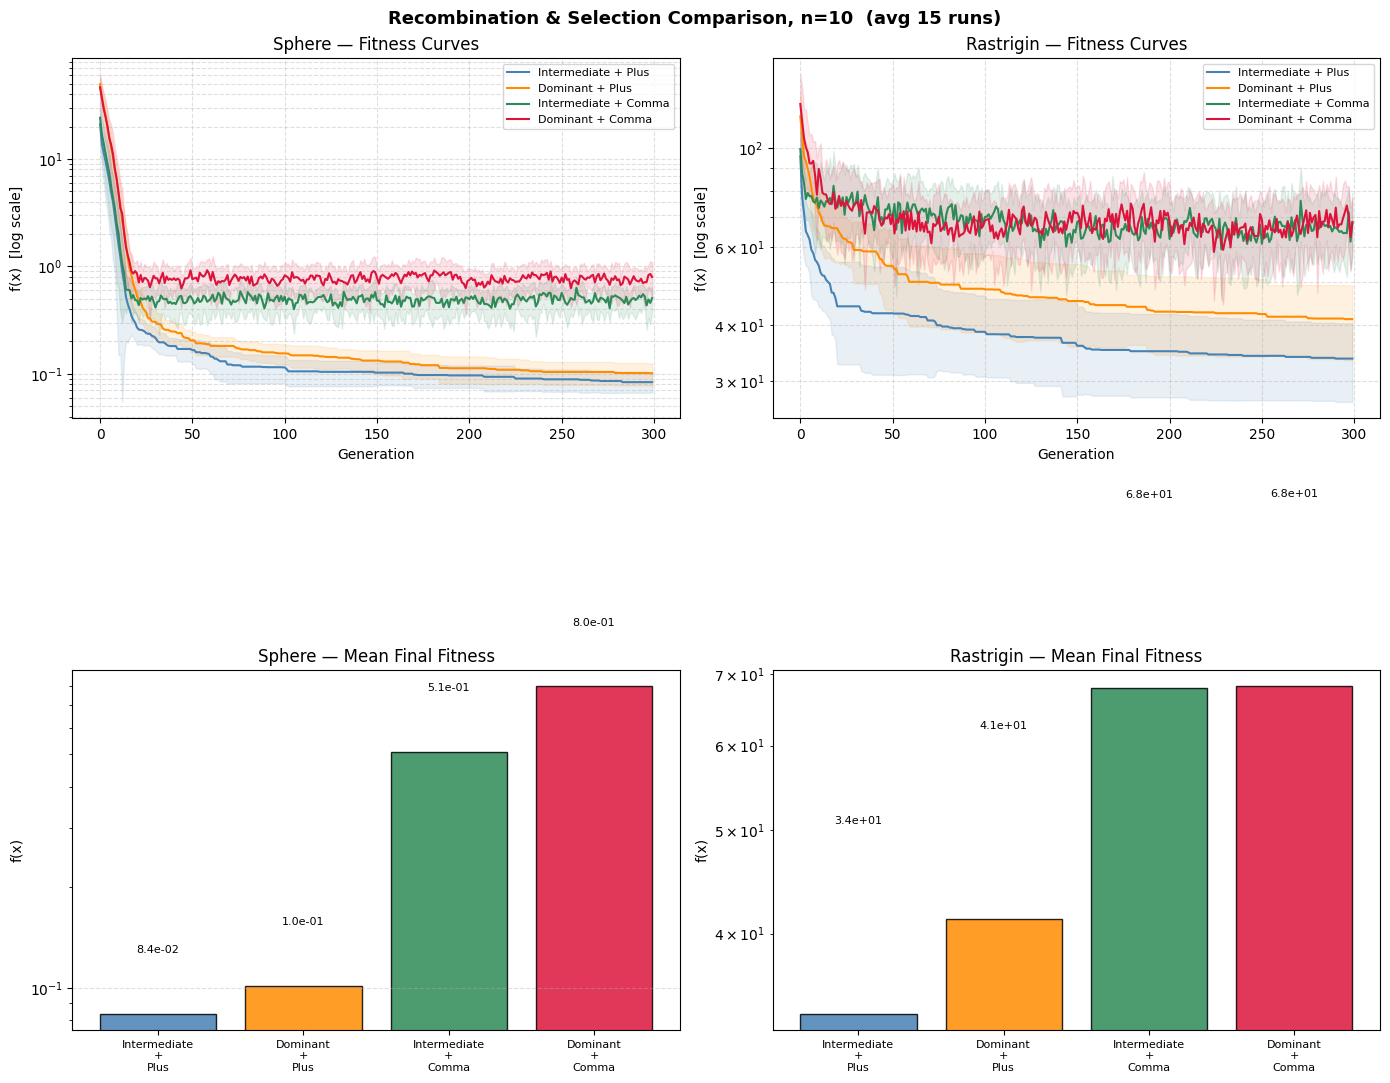

Figure 2 saved — recombination & selection comparison

Configuration                              Sphere            Rastrigin
Intermediate + Plus                  8.365711e-02         3.364984e+01
Dominant + Plus                      1.014615e-01         4.127363e+01
Intermediate + Comma                 5.078574e-01         6.794726e+01
Dominant + Comma                     7.973784e-01         6.816297e+01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

# Benchmark functions
def sphere(x):
    return np.sum(x**2)
def rastrigin(x):
    x = np.array(x)
    return 10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

BENCHMARKS = {"Sphere": sphere, "Rastrigin": rastrigin}

# (a) (μ+λ)-ES with intermediate recombination
def recombine(parents, mode="intermediate"):
    """
    Recombine two randomly selected parents.
    Intermediate: child = average of two parents (exploits both)
    Dominant:     child = randomly pick each gene from one of the two parents
    """
    p1, p2 = parents[np.random.randint(len(parents))], \
              parents[np.random.randint(len(parents))]

    if mode == "intermediate":
        return 0.5 * (p1 + p2)  # mean of both
    elif mode == "dominant":
        mask = np.random.rand(len(p1)) < 0.5  # gene-wise coin flip
        return np.where(mask, p1, p2)


def mu_plus_lambda_es(fitness_fn, dim=10, mu=5, lmbda=20,
                      generations=300, sigma=0.3,
                      recombination="intermediate",
                      selection="plus"):
    if selection == "comma" and lmbda < mu:
        raise ValueError(f"Comma selection requires lmbda ({lmbda}) >= mu ({mu})")
    population = np.random.uniform(-5, 5, (mu, dim))
    history    = []

    for _ in range(generations):
        offspring = np.array([
            recombine(population, mode=recombination) + sigma * np.random.randn(dim)
            for _ in range(lmbda)
        ])

        if selection == "plus":
            pool = np.vstack([population, offspring])   
        else:  # comma
            pool = offspring                             

        fitnesses    = np.array([fitness_fn(ind) for ind in pool])
        best_indices = np.argsort(fitnesses)[:mu]
        population   = pool[best_indices]
        history.append(fitnesses[best_indices[0]])

    return population[0], history

# (b) Run (μ+λ)-ES on benchmark set, n=10
N_RUNS = 15
GENS   = 300
DIM    = 10

def avg_runs(fitness_fn, **kwargs):
    all_h = []
    for _ in range(N_RUNS):
        _, h = mu_plus_lambda_es(fitness_fn, dim=DIM, generations=GENS, **kwargs)
        all_h.append(h)
    arr = np.array(all_h)
    return arr.mean(axis=0), arr.std(axis=0)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle(f"(μ+λ)-ES, Intermediate Recombination, n={DIM}  (avg {N_RUNS} runs)",
             fontsize=12, fontweight="bold")
for ax, (name, fn) in zip(axes, BENCHMARKS.items()):
    mean, std = avg_runs(fn, sigma=0.3, recombination="intermediate", selection="plus")
    gens = np.arange(GENS)
    ax.semilogy(gens, mean, color="steelblue")
    ax.fill_between(gens,
                    np.maximum(mean - std, 1e-30),
                    mean + std,
                    alpha=0.2, color="steelblue")
    ax.set_title(f"{name}  |  final: {mean[-1]:.3e}")
    ax.set_xlabel("Generation"); ax.set_ylabel("f(x)  [log scale]")
    ax.grid(True, which="both", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()
plt.close()

# (c)
CONFIGS = {
    "Intermediate + Plus":    dict(recombination="intermediate", selection="plus"),
    "Dominant + Plus":        dict(recombination="dominant",     selection="plus"),
    "Intermediate + Comma":   dict(recombination="intermediate", selection="comma"),
    "Dominant + Comma":       dict(recombination="dominant",     selection="comma"),
}
config_colors = {
    "Intermediate + Plus":  "steelblue",
    "Dominant + Plus":      "darkorange",
    "Intermediate + Comma": "seagreen",
    "Dominant + Comma":     "crimson",
}

fig, axes = plt.subplots(2, 2, figsize=(14, 11))
fig.suptitle(f"Recombination & Selection Comparison, n={DIM}  (avg {N_RUNS} runs)",
             fontsize=13, fontweight="bold")

summary = {}   

for col, (name, fn) in enumerate(BENCHMARKS.items()):
    results = {}
    for label, cfg in CONFIGS.items():
        mean, std = avg_runs(fn, sigma=0.3, **cfg)
        results[label] = (mean, std)
        summary[(name, label)] = mean[-1]
    ax = axes[0, col]
    gens = np.arange(GENS)
    for label, (mean, std) in results.items():
        ax.semilogy(gens, mean, label=label, color=config_colors[label])
        ax.fill_between(gens,
                        np.maximum(mean - std, 1e-30),
                        mean + std,
                        alpha=0.12, color=config_colors[label])
    ax.set_title(f"{name} — Fitness Curves")
    ax.set_xlabel("Generation"); ax.set_ylabel("f(x)  [log scale]")
    ax.legend(fontsize=8); ax.grid(True, which="both", linestyle="--", alpha=0.4)

    ax = axes[1, col]
    labels     = list(CONFIGS.keys())
    finals     = [summary[(name, l)] for l in labels]
    bar_colors = [config_colors[l] for l in labels]
    bars = ax.bar(range(len(labels)), finals, color=bar_colors,
                  edgecolor="black", alpha=0.85)
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels([l.replace(" + ", "\n+\n") for l in labels], fontsize=8)
    ax.set_title(f"{name} — Mean Final Fitness")
    ax.set_ylabel("f(x)"); ax.set_yscale("log")
    for bar, val in zip(bars, finals):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.5,
                f"{val:.1e}", ha="center", va="bottom", fontsize=8)
    ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()
plt.close()

print("\n" + "=" * 75)
print(f"{'Configuration':<28} {'Sphere':>20} {'Rastrigin':>20}")
print("=" * 75)
for label in CONFIGS:
    s = summary[("Sphere",    label)]
    r = summary[("Rastrigin", label)]
    print(f"{label:<28} {s:>20.6e} {r:>20.6e}")
print("=" * 75)